# Jellyfish EDA


데이터셋
데이터셋 정보

- Moon jellyfish (Aurelia aurita): 반투명한 몸통(exumbrella) 넘어로 4개의 말발굽 모양의 생식선이 보이는 일반적인 해파리입니다. 촉수로 메두사, 플랑크톤, 연체동물을 모아서 잡아먹습니다.
- Barrel jellyfish (Rhizostoma pulmo): 영국 해역에서 발견되는 가장 큰 해파리로 지름이 90cm까지 자랄 수 있습니다. 촉수로 플랑크톤과 작은 물고기를 잡아서 먹습니다.
- Blue jellyfish (Cyanea lamarckii): 지름이 30cm까지 자랄 수 있는 큰 해파리입니다. 촉수로 플랑크톤과 작은 물고기를 잡아먹습니다.
- Compass jellyfish (Chrysaora hysoscella): 몸통의 갈색 모양이 나침반을 닮아 이름지어졌습니다. 촉수로 플랑크톤이나 작은 물고기를 잡아먹습니다.
- Lion’s mane jellyfish (Cyanea capillata): 세계에서 가장 큰 해파리로, 몸통은 2미터까지 자라며 촉수는 30미터에 다다릅니다. 촉수로 플랑크톤과 작은 물고기를 잡아먹습니다.
- Mauve stinger (Pelagia noctiluca): 긴 촉수를 가졌으며 몸통에 독을 쏘는 세포로 가득찬 혹 같은 구조물을 가진 작은 해파리입니다. 작은 해파리나 멍게를 잡아먹습니다.
해당 데이터를 토대로 추론 결과를 자유롭게 구성하고 표현해주세요.



데이터 다운로드 방법
cloud shell에서 아래를 먼저 실행시켜주세요.
$ mkdir ~/aiffel/jellyfish
$ pip install kaggle
kaggle 가입 후 아래 주소를 복사해 user_name 자리에 자신의 아이디를 넣은 후 접속해주세요.
https://www.kaggle.com/<user_name>/account

Create New Token 선택하여 kaggle.json 파일을 다운로드 받습니다.

kaggle.json 파일을 lms 클라우드에 업로드합니다.

cloud shell에서 아래 코드를 실행시켜주세요. kaggle.json 파일을 업로드한 위치에 맞춰 코드를 수정해주세요.

$ mkdir ~/.kaggle
$ mv kaggle.json ~/.kaggle/kaggle.json
$ cd ~/aiffel/jellyfish
$ kaggle datasets download -d anshtanwar/jellyfish-types
$ unzip jellyfish-types.zip
1~5까지의 과정이 제대로 수행되었다면 아래와 같은 디렉토리 구조가 되어야합니다.
단, jellyfish-types.zip과 Jellyfish.zip은 동일 파일이며 jellyfish 하위 폴더들(barrel_jellyfish, blue_jellyfish, compass_jellyfish, lions_mane_jellyfish, mauve_stinger_jellyfish, Moon_jellyfish)은 Train_Test_Valid 폴더의 Train 데이터와 동일합니다.

/aiffel/aiffel/jellyfish/barrel_jellyfish/
                        /blue_jellyfish/
                        /compass_jellyfish/
                        /lions_mane_jellyfish/
                        /mauve_stinger_jellyfish/
                        /Moon_jellyfish/
                        /Train_Test_Valid/
                        /jellyfish-types.zip
                        /Jellyfish.zip
       /.kaggle/kaggle.json
Train_Test_Valid 데이터를 이용하는 것을 추천합니다.
해당 데이터는 kaggle의 다음 데이터를 가져왔습니다. 데이터에 대한 상세한 내용은 링크를 참조해주세요. 링크


과업
딥러닝 모델을 이용하여 해파리 이미지를 받아 class를 분류해봅니다.

규칙
프로젝트 제출 기한내 LMS의 프로젝트 제출 스텝에서 결과 노트북의 링크를 제출해주세요.
프로젝트 제출 스텝의 루브릭을 따라 노트북의 내용을 채워주세요.
외부 데이터 활용은 허용하되, 제공된 데이터를 활용한 기록이 필수적으로 포함되어야 합니다.
부정 제출 행위를 금지하고 있으며, 부정 제출 이력이 있는 경우 평가가 제한됩니다.


# EDA

In [1]:
import pathlib
from PIL import Image
import tensorflow as tf
from tensorflow.keras import utils,layers, Sequential

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import random

%matplotlib inline
import matplotlib.image as mpimg


import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

# Google 드라이브 마운트
# drive.mount('/content/drive')


In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.0


# 데이터 전체구조

In [3]:
# 데이터셋 경로 설정 및 확인
dataset_path = os.getenv('HOME')+'/aiffel/jellyfish'
Train_Test_Valid = os.getenv('HOME')+'/aiffel/Train_Test_Valid'
train_set_raw = os.getenv('HOME')+'/aiffel/Train_Test_Valid/Train'
valid_set_raw = os.getenv('HOME')+'/aiffel/Train_Test_Valid/valid'
test_set_raw = os.getenv('HOME')+'/aiffel/Train_Test_Valid/test'

In [4]:
import os

def display_folder_structure_and_count_images(folder_path, prefix=''):
    total_images = 0  # 현재 폴더 및 하위 폴더의 이미지 총 개수
    files_and_folders = sorted(os.listdir(folder_path))

    # 들여쓰기를 위한 공백 문자열 생성
    indent = '    ' * prefix.count('├')  # 깊이에 따라 공백 추가

    # 현재 폴더의 이미지 개수를 저장할 변수
    folder_image_count = 0

    # 폴더 내의 각 항목에 대해 처리
    for index, entry in enumerate(files_and_folders):
        if os.path.isdir(os.path.join(folder_path, entry)):  # 폴더인 경우
            # 폴더명과 함께 현재까지의 들여쓰기를 출력하고, 하위 폴더로 재귀 호출
            sub_prefix = prefix + ('├── ' if index < len(files_and_folders) - 1 else '└── ')
            print(f"{indent}{sub_prefix}{entry}")
            image_count, _ = display_folder_structure_and_count_images(os.path.join(folder_path, entry), prefix + ('│   ' if index < len(files_and_folders) - 1 else '    '))
            folder_image_count += image_count
        elif entry.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일인 경우
            folder_image_count += 1

    # 현재 폴더의 이미지 개수를 출력
    print(f"{indent}{prefix}✼ {folder_image_count} images")

    # 폴더 총 이미지 수 업데이트
    total_images += folder_image_count
    return folder_image_count, total_images

# 데이터셋 경로 설정 및 확인
tree_path = dataset_path  # 경로 설정

# 폴더 구조 시각화 및 이미지 개수 출력
_, total_images = display_folder_structure_and_count_images(tree_path)
print(f"\nTotal images in all folders: {total_images}")


├── .ipynb_checkpoints
│   ✼ 0 images
├── Moon_jellyfish
│   ✼ 150 images
├── barrel_jellyfish
│   ✼ 150 images
├── blue_jellyfish
│   ✼ 150 images
├── compass_jellyfish
│   ✼ 150 images
├── lions_mane_jellyfish
│   ✼ 150 images
└── mauve_stinger_jellyfish
    ✼ 150 images
✼ 900 images

Total images in all folders: 900


# Train_Valid_Test 폴더 구조와 이미지 사이즈

In [5]:
import os

def display_folder_structure_and_count_images(folder_path, prefix='', counts=None):
    if counts is None:
        counts = {'train': 0, 'valid': 0, 'test': 0}

    total_images = 0  # 현재 폴더 및 하위 폴더의 이미지 총 개수
    files_and_folders = sorted(os.listdir(folder_path))

    indent = '    ' * prefix.count('├')
    folder_image_count = 0

    for index, entry in enumerate(files_and_folders):
        full_path = os.path.join(folder_path, entry)
        if os.path.isdir(full_path):
            sub_prefix = prefix + ('├── ' if index < len(files_and_folders) - 1 else '└── ')
            print(f"{indent}{sub_prefix}{entry}")
            image_count, _ = display_folder_structure_and_count_images(full_path, prefix + ('│   ' if index < len(files_and_folders) - 1 else '    '), counts)
            folder_image_count += image_count

            # 폴더명에 따라 적절한 카운트에 추가
            if entry.lower() == 'train':
                counts['train'] += image_count
            elif entry.lower() == 'valid':
                counts['valid'] += image_count
            elif entry.lower() == 'test':
                counts['test'] += image_count
        elif entry.lower().endswith(('.png', '.jpg', '.jpeg')):
            folder_image_count += 1

    print(f"{indent}{prefix}✼ {folder_image_count} images")
    total_images += folder_image_count
    return folder_image_count, counts

# 데이터셋 경로 설정 및 확인
# base_path = Train_Test_Valid

# 폴더 구조 시각화 및 이미지 개수 출력
_, counts = display_folder_structure_and_count_images(Train_Test_Valid)

# 각 폴더별 이미지 개수 출력
print(f"\ntrain images: {counts['train']}")
print(f"valid images: {counts['valid']}")
print(f"test images: {counts['test']}")


├── Train
│   ├── Moon_jellyfish
│   │   ✼ 150 images
│   ├── barrel_jellyfish
│   │   ✼ 150 images
│   ├── blue_jellyfish
│   │   ✼ 150 images
│   ├── compass_jellyfish
│   │   ✼ 150 images
│   ├── lions_mane_jellyfish
│   │   ✼ 150 images
│   └── mauve_stinger_jellyfish
│       ✼ 150 images
│   ✼ 900 images
├── test
│   ├── Moon_jellyfish
│   │   ✼ 6 images
│   ├── barrel_jellyfish
│   │   ✼ 5 images
│   ├── blue_jellyfish
│   │   ✼ 7 images
│   ├── compass_jellyfish
│   │   ✼ 7 images
│   ├── lions_mane_jellyfish
│   │   ✼ 8 images
│   └── mauve_stinger_jellyfish
│       ✼ 7 images
│   ✼ 40 images
└── valid
    ├── Moon_jellyfish
    │   ✼ 6 images
    ├── barrel_jellyfish
    │   ✼ 5 images
    ├── blue_jellyfish
    │   ✼ 7 images
    ├── compass_jellyfish
    │   ✼ 7 images
    ├── lions_mane_jellyfish
    │   ✼ 7 images
    └── mauve_stinger_jellyfish
        ✼ 7 images
    ✼ 39 images
✼ 979 images

train images: 900
valid images: 39
test images: 40


In [6]:
# pd.DataFrame(os.listdir(dataset_path),columns=['Files_Name'])

# 파일/폴더 탐색결과 (1908개)와 pandas 데이터프레임 결과(1907개)의 상이한 결과 인지

In [7]:
import os
import glob

# 이미지 파일 확장자 설정
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

# 이미지 파일과 폴더 개수를 세기 위한 변수 초기화
image_count = 0
folder_count = 0

# 모든 파일과 폴더에 대해 반복
for item in glob.glob(dataset_path + '/**', recursive=True):
    if os.path.isfile(item) and os.path.splitext(item)[1].lower() in image_extensions:
        image_count += 1
    elif os.path.isdir(item):
        folder_count += 1

files = [i for i in glob.glob(dataset_path + "/**/*", recursive=True)]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataset_dataframe = pan.DataFrame(data, columns = ["Image", "Label"])

# 결과 출력
print(f"Image count: {image_count}")
print(f"Folder count: {folder_count}")
dataset_dataframe


Image count: 900
Folder count: 7


,Image,Label
0,/aiffel/aiffel/jellyfish/barrel_jellyfish/aug-...,barrel_jellyfish
1,/aiffel/aiffel/jellyfish/compass_jellyfish/aug...,compass_jellyfish
2,/aiffel/aiffel/jellyfish/mauve_stinger_jellyfi...,mauve_stinger_jellyfish
3,/aiffel/aiffel/jellyfish/lions_mane_jellyfish/...,lions_mane_jellyfish
4,/aiffel/aiffel/jellyfish/blue_jellyfish/aug-24...,blue_jellyfish
...,...,...
901,/aiffel/aiffel/jellyfish/lions_mane_jellyfish/...,lions_mane_jellyfish
902,/aiffel/aiffel/jellyfish/Moon_jellyfish/aug-47...,Moon_jellyfish
903,/aiffel/aiffel/jellyfish/mauve_stinger_jellyfi...,mauve_stinger_jellyfish
904,/aiffel/aiffel/jellyfish/mauve_stinger_jellyfi...,mauve_stinger_jellyfish


## 중복 파일 탐색

In [8]:

from collections import defaultdict

# 이미지 파일 확장자 설정
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

# 폴더별 파일 목록을 저장하기 위한 딕셔너리 초기화
folder_files = defaultdict(set)

# 모든 파일에 대해 반복
for filepath in glob.glob(dataset_path + "/**/*", recursive=True):
    if os.path.isfile(filepath) and os.path.splitext(filepath)[1].lower() in image_extensions:
        # 파일의 폴더 경로와 파일명 분리
        folder_path, filename = os.path.split(filepath)
        # 해당 폴더의 파일 목록에 파일명 추가
        folder_files[folder_path].add(filename)

# 중복 파일 검사 및 개수 계산
duplicates_count = 0
for filenames in folder_files.values():
    file_count = defaultdict(int)
    for filename in filenames:
        file_count[filename] += 1

    # 중복 파일 개수 추가
    duplicates_count += sum(1 for count in file_count.values() if count > 1)

# 결과 출력
if duplicates_count == 0:
    print("중복된 파일이 없습니다.")
else:
    print(f"중복된 파일이 {duplicates_count}개 있습니다.")


중복된 파일이 없습니다.


## 이미지 아닌 파일 탐색

In [9]:


# 이미지 파일 확장자 설정
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

# 이미지 파일이 아닌 파일의 존재 여부를 확인하기 위한 플래그
non_image_file_exists = False

# 모든 파일에 대해 반복
for filepath in glob.glob(dataset_path + "/**/*", recursive=True):
    if os.path.isfile(filepath):
        # 파일의 확장자가 이미지 파일 확장자 목록에 없는 경우
        if not os.path.splitext(filepath)[1].lower() in image_extensions:
            non_image_file_exists = True
            break  # 이미지가 아닌 파일을 발견하면 루프 종료

# 결과 출력
if non_image_file_exists:
    print("이미지가 아닌 파일이 있습니다.")
else:
    print("이미지가 아닌 파일이 없습니다.")


이미지가 아닌 파일이 없습니다.


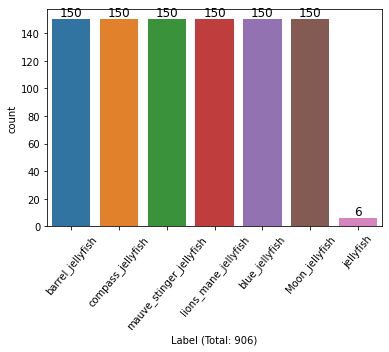

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label 열에 대한 countplot 생성
sns.countplot(x=dataset_dataframe["Label"])

# 각 막대에 개수 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
             fontsize=12, ha='center', va='bottom')

# x축 라벨의 각도 조정
plt.xticks(rotation=50)

# 전체 라벨 개수 출력
total_labels = len(dataset_dataframe["Label"])
plt.xlabel(f'Label (Total: {total_labels})')

# 그래프 표시
plt.show()


# 파일/폴더 탐색결과 (1908개)와 pandas 데이터프레임 결과(1907개)의 결과 불일치에 대한 판단

파일/폴더탐색 결과(전체 이미지 파일 갯수: 1879 + 전체 폴더 갯수: 29 = 1908개)와 dataset_dataframe에 pandas 데이터프레임 결과(1907개) 사이의 불일치는 아래와 같은 몇 가지 이유로 발생할 수 있음을 알게 되었습니다.

 1. 중복 파일 경로: files 리스트에서 중복된 파일 경로가 있을 수 있습니다. 이 경우, data와 dataset_dataframe은 중복된 항목을 제외하고 생성될 것입니다.

 2. 폴더 내 이미지 파일이 아닌 파일: folder_count는 폴더의 개수를 세지만, image_count는 특정 확장자를 가진 파일만 세고 있습니다. 따라서 폴더 내에 이미지 파일이 아닌 다른 형식의 파일이 있을 경우, 이들은 dataset_dataframe에 포함되지 않을 수 있습니다.

 3. 파일 경로 처리의 차이: glob.glob(dataset_path + "/**/*", recursive=True)는 모든 파일과 폴더를 반환하지만, labels 리스트를 만들 때 폴더 경로는 제외될 수 있습니다. 이는 파일 경로에서 레이블을 추출하는 방식 때문일 수 있습니다.

 4. 에러 또는 예외 처리: 코드 실행 중에 오류나 예외가 발생했을 수 있습니다. 예를 들어, 파일 경로가 잘못되었거나 접근 권한이 없는 파일이 있을 수 있습니다.

이러한 요소들을 고려하여 코드의 실행 결과를 해석하면, dataset_dataframe에 1907행이 있고, 이는 이미지 파일의 수와 폴더의 수를 단순히 합한 것과 다를 수 있음을 이해할 수 있습니다. 데이터 처리 과정에서 발생할 수 있는 여러 상황을 고려하여 이러한 불일치가 발생했을 수 있습니다.

## Train_Valid_Test

In [11]:
files = [i for i in glob.glob(Train_Test_Valid + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
TTV_dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
TTV_dataframe

,Image,Label
0,/aiffel/aiffel/Train_Test_Valid/test/blue_jell...,test
1,/aiffel/aiffel/Train_Test_Valid/valid/blue_jel...,valid
2,/aiffel/aiffel/Train_Test_Valid/valid/compass_...,valid
3,/aiffel/aiffel/Train_Test_Valid/Train/barrel_j...,Train
4,/aiffel/aiffel/Train_Test_Valid/test/barrel_je...,test
5,/aiffel/aiffel/Train_Test_Valid/test/mauve_sti...,test
6,/aiffel/aiffel/Train_Test_Valid/Train/lions_ma...,Train
7,/aiffel/aiffel/Train_Test_Valid/test/Moon_jell...,test
8,/aiffel/aiffel/Train_Test_Valid/test/compass_j...,test
9,/aiffel/aiffel/Train_Test_Valid/valid/Moon_jel...,valid


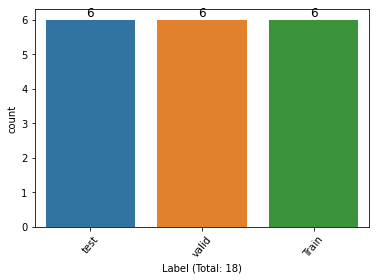

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label 열에 대한 countplot 생성
sns.countplot(x=TTV_dataframe["Label"])

# 각 막대에 개수 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
             fontsize=12, ha='center', va='bottom')

# x축 라벨의 각도 조정
plt.xticks(rotation=50)

# 전체 라벨 개수 출력
total_labels = len(TTV_dataframe["Label"])
plt.xlabel(f'Label (Total: {total_labels})')

# 그래프 표시
plt.show()


## Train folder

In [13]:
files = [i for i in glob.glob(train_set_raw + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
train_dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
train_dataframe

,Image,Label
0,/aiffel/aiffel/Train_Test_Valid/Train/blue_jel...,blue_jellyfish
1,/aiffel/aiffel/Train_Test_Valid/Train/lions_ma...,lions_mane_jellyfish
2,/aiffel/aiffel/Train_Test_Valid/Train/barrel_j...,barrel_jellyfish
3,/aiffel/aiffel/Train_Test_Valid/Train/mauve_st...,mauve_stinger_jellyfish
4,/aiffel/aiffel/Train_Test_Valid/Train/lions_ma...,lions_mane_jellyfish
...,...,...
895,/aiffel/aiffel/Train_Test_Valid/Train/compass_...,compass_jellyfish
896,/aiffel/aiffel/Train_Test_Valid/Train/mauve_st...,mauve_stinger_jellyfish
897,/aiffel/aiffel/Train_Test_Valid/Train/blue_jel...,blue_jellyfish
898,/aiffel/aiffel/Train_Test_Valid/Train/blue_jel...,blue_jellyfish


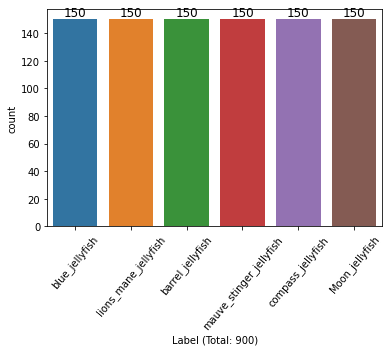

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label 열에 대한 countplot 생성
sns.countplot(x=train_dataframe["Label"])

# 각 막대에 개수 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
             fontsize=12, ha='center', va='bottom')

# x축 라벨의 각도 조정
plt.xticks(rotation=50)

# 전체 라벨 개수 출력
total_labels = len(train_dataframe["Label"])
plt.xlabel(f'Label (Total: {total_labels})')

# 그래프 표시
plt.show()

## Valid folder

In [15]:
files = [i for i in glob.glob(valid_set_raw + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
valid_dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
valid_dataframe

,Image,Label
0,/aiffel/aiffel/Train_Test_Valid/valid/lions_ma...,lions_mane_jellyfish
1,/aiffel/aiffel/Train_Test_Valid/valid/lions_ma...,lions_mane_jellyfish
2,/aiffel/aiffel/Train_Test_Valid/valid/lions_ma...,lions_mane_jellyfish
3,/aiffel/aiffel/Train_Test_Valid/valid/lions_ma...,lions_mane_jellyfish
4,/aiffel/aiffel/Train_Test_Valid/valid/barrel_j...,barrel_jellyfish
5,/aiffel/aiffel/Train_Test_Valid/valid/barrel_j...,barrel_jellyfish
6,/aiffel/aiffel/Train_Test_Valid/valid/mauve_st...,mauve_stinger_jellyfish
7,/aiffel/aiffel/Train_Test_Valid/valid/blue_jel...,blue_jellyfish
8,/aiffel/aiffel/Train_Test_Valid/valid/barrel_j...,barrel_jellyfish
9,/aiffel/aiffel/Train_Test_Valid/valid/Moon_jel...,Moon_jellyfish


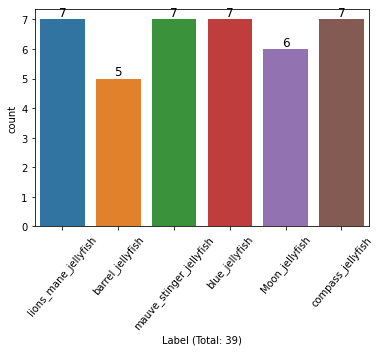

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label 열에 대한 countplot 생성
sns.countplot(x=valid_dataframe["Label"])

# 각 막대에 개수 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
             fontsize=12, ha='center', va='bottom')

# x축 라벨의 각도 조정
plt.xticks(rotation=50)

# 전체 라벨 개수 출력
total_labels = len(valid_dataframe["Label"])
plt.xlabel(f'Label (Total: {total_labels})')

# 그래프 표시
plt.show()


## Test folder

In [17]:
files = [i for i in glob.glob(test_set_raw + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
test_dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
test_dataframe

,Image,Label
0,/aiffel/aiffel/Train_Test_Valid/test/compass_j...,compass_jellyfish
1,/aiffel/aiffel/Train_Test_Valid/test/lions_man...,lions_mane_jellyfish
2,/aiffel/aiffel/Train_Test_Valid/test/Moon_jell...,Moon_jellyfish
3,/aiffel/aiffel/Train_Test_Valid/test/mauve_sti...,mauve_stinger_jellyfish
4,/aiffel/aiffel/Train_Test_Valid/test/lions_man...,lions_mane_jellyfish
5,/aiffel/aiffel/Train_Test_Valid/test/blue_jell...,blue_jellyfish
6,/aiffel/aiffel/Train_Test_Valid/test/Moon_jell...,Moon_jellyfish
7,/aiffel/aiffel/Train_Test_Valid/test/blue_jell...,blue_jellyfish
8,/aiffel/aiffel/Train_Test_Valid/test/mauve_sti...,mauve_stinger_jellyfish
9,/aiffel/aiffel/Train_Test_Valid/test/mauve_sti...,mauve_stinger_jellyfish


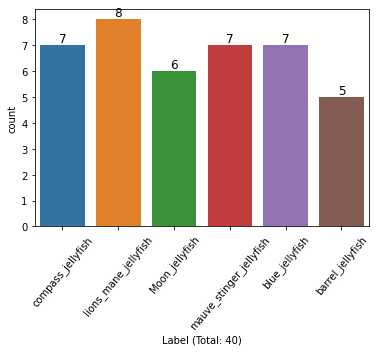

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label 열에 대한 countplot 생성
sns.countplot(x=test_dataframe["Label"])

# 각 막대에 개수 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
             fontsize=12, ha='center', va='bottom')

# x축 라벨의 각도 조정
plt.xticks(rotation=50)

# 전체 라벨 개수 출력
total_labels = len(test_dataframe["Label"])
plt.xlabel(f'Label (Total: {total_labels})')

# 그래프 표시
plt.show()


## Train data 클래스별로 이미지 한 장씩 보기

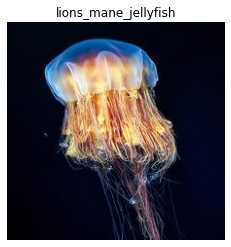

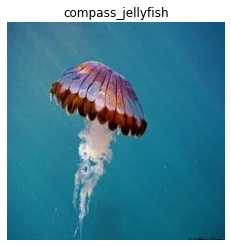

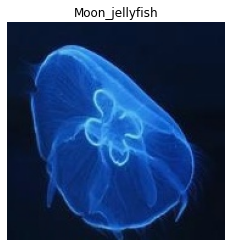

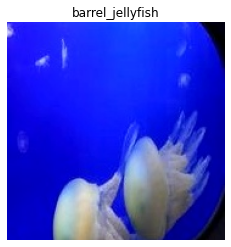

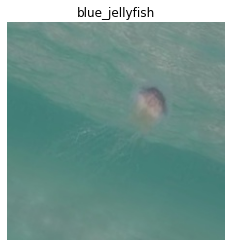

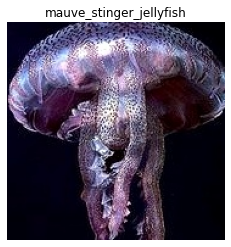

In [19]:
# path
# train_path = '/content/drive/MyDrive/ColabNotebooks/aiffel/DLthon/jellyfish/Train_Test_Valid/Train'

def display_images(dataset_path, num_samples=1):
    for label in os.listdir(train_set_raw):
        label_path = os.path.join(train_set_raw, label)
        image_files = os.listdir(label_path)

        sample_images = random.sample(image_files, num_samples)

        for image_file in sample_images:
            image_path = os.path.join(label_path, image_file)

            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.imshow(image)
            plt.title(label)
            plt.axis('off')
            plt.show()

display_images(dataset_path)

## Dataset 전체 이미지사이즈 파악

In [20]:
import os
from PIL import Image

def display_folder_structure_and_count_images_by_size(folder_path, prefix=''):
    size_count = {}  # 현재 폴더 및 하위 폴더의 이미지 사이즈별 개수
    files_and_folders = sorted(os.listdir(folder_path))

    # 들여쓰기를 위한 공백 문자열 생성
    indent = '    ' * prefix.count('├')  # 깊이에 따라 공백 추가

    # 폴더 내의 각 항목에 대해 처리
    for index, entry in enumerate(files_and_folders):
        full_path = os.path.join(folder_path, entry)
        if os.path.isdir(full_path):  # 폴더인 경우
            # 폴더명과 함께 현재까지의 들여쓰기를 출력하고, 하위 폴더로 재귀 호출
            sub_prefix = prefix + ('├── ' if index < len(files_and_folders) - 1 else '└── ')
            print(f"{indent}{sub_prefix}{entry}")
            sub_folder_size_count = display_folder_structure_and_count_images_by_size(full_path, prefix + ('│   ' if index < len(files_and_folders) - 1 else '    '))
            for size, count in sub_folder_size_count.items():
                size_count[size] = size_count.get(size, 0) + count
        elif entry.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일인 경우
            with Image.open(full_path) as img:
                size = img.size
                size_count[size] = size_count.get(size, 0) + 1

    # 현재 폴더의 이미지 사이즈별 개수를 출력
    print(f"{indent}{prefix}✼ Image sizes: {size_count}")

    return size_count

# 데이터셋 경로 설정 및 확인
tree_path = dataset_path  # 경로 설정

# 폴더 구조 시각화 및 이미지 사이즈별 개수 출력
display_folder_structure_and_count_images_by_size(tree_path)


├── .ipynb_checkpoints
│   ✼ Image sizes: {}
├── Moon_jellyfish
│   ✼ Image sizes: {(224, 224): 103, (179, 179): 47}
├── barrel_jellyfish
│   ✼ Image sizes: {(224, 224): 97, (179, 179): 53}
├── blue_jellyfish
│   ✼ Image sizes: {(224, 224): 107, (179, 179): 43}
├── compass_jellyfish
│   ✼ Image sizes: {(224, 224): 109, (179, 179): 41}
├── lions_mane_jellyfish
│   ✼ Image sizes: {(224, 224): 108, (179, 179): 42}
└── mauve_stinger_jellyfish
    ✼ Image sizes: {(224, 224): 108, (179, 179): 42}
✼ Image sizes: {(224, 224): 632, (179, 179): 268}


{(224, 224): 632, (179, 179): 268}

In [21]:
import os
import glob
from PIL import Image
from collections import defaultdict

# 이미지 사이즈별 개수를 저장하기 위한 딕셔너리 초기화
size_count = defaultdict(int)

# 모든 하위 폴더의 이미지 파일에 대해 반복
for filepath in glob.glob(os.path.join(dataset_path, '**/*'), recursive=True):
    if os.path.isfile(filepath):
        try:
            with Image.open(filepath) as img:
                # 이미지 사이즈 추출
                size = img.size
                # 해당 사이즈의 개수 증가
                size_count[size] += 1
        except IOError:
            # 이미지 파일이 아니거나 손상된 경우
            continue

# 각 이미지 사이즈별 개수 출력
for size, count in size_count.items():
    print(f"Size: {size}, Count: {count}")


Size: (224, 224), Count: 632
Size: (179, 179), Count: 268


## 이미지 데이터 결측치 검사

In [22]:
import os
from PIL import Image

dataset_path = 'dataset_path'  # 데이터셋 경로
image_extensions = ['.png', '.jpg', '.jpeg']  # 인식할 이미지 확장자 목록
missing_files = []

# 데이터셋의 모든 파일에 대해 반복
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if any(file.endswith(ext) for ext in image_extensions):
            file_path = os.path.join(root, file)
            try:
                # 이미지 로드 시도
                with Image.open(file_path) as img:
                    img.verify()  # 이미지 파일 손상 여부 확인
            except (IOError, SyntaxError) as e:
                # 파일 로드 실패 시 목록에 추가
                missing_files.append(file_path)

# 결측치(손상된 파일) 목록 확인 및 출력
if missing_files:
    print(f"읽을 수 없거나 손상된 파일: {missing_files}") #이미지에 문제가 있으면 경로/파일명 출력하도록
else:
    print("읽을 수 없거나 손상된 파일이 없습니다.")

읽을 수 없거나 손상된 파일이 없습니다.


# 데이터 전처리

훈련 데이터의 수가 적어 과적합의 위험을 방지하고자 데이터 증강을 실시하였음.
- Image resizing
- Normalizaition
- data augmantation

In [23]:
barrel_path = os.getenv('HOME')+'/aiffel/jellyfish/barrel_jellyfish'
blue_path = os.getenv('HOME')+'/aiffel/jellyfish/blue_jellyfish'
compass_path = os.getenv('HOME')+'/aiffel/jellyfish/compass_jellyfish'
lions_mane_path = os.getenv('HOME')+'/aiffel/jellyfish/lions_mane_jellyfish'
mauve_path = os.getenv('HOME')+'/aiffel/jellyfish/mauve_stinger_jellyfish'
moon_path = os.getenv('HOME')+'/aiffel/jellyfish/Moon_jellyfish'

In [24]:
barrel_jpg = glob.glob(os.path.join(barrel_path, "*.jpg")) + glob.glob(os.path.join(barrel_path, "*.JPG"))
blue_jpg = glob.glob(os.path.join(blue_path, "*.jpg")) + glob.glob(os.path.join(blue_path, "*.JPG"))
compass_jpg = glob.glob(os.path.join(compass_path, "*.jpg")) + glob.glob(os.path.join(compass_path, "*.JPG"))
lions_mane_jpg = glob.glob(os.path.join(lions_mane_path, "*.jpg")) + glob.glob(os.path.join(lions_mane_path, "*.JPG"))
mauve_jpg = glob.glob(os.path.join(mauve_path, "*.jpg")) + glob.glob(os.path.join(mauve_path, "*.JPG"))
moon_jpg = glob.glob(os.path.join(moon_path, "*.jpg")) + glob.glob(os.path.join(moon_path, "*.JPG"))

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [180, 180]) 
    image /= 255.0  
    return image

processed_barrel = [load_and_preprocess_image(path) for path in barrel_jpg]
processed_blue = [load_and_preprocess_image(path) for path in blue_jpg]
processed_compass = [load_and_preprocess_image(path) for path in compass_jpg]
processed_lions = [load_and_preprocess_image(path) for path in lions_mane_jpg]
processed_mauve = [load_and_preprocess_image(path) for path in mauve_jpg]
processed_moon = [load_and_preprocess_image(path) for path in moon_jpg]

In [26]:
# 이미지 증강 클래스 생성

class ImageAugment:
    def __init__(self):
        pass
        
    def rotate(self, image):
        rotated_img = tf.image.rot90(image)
        return rotated_img

    def zoom(self, image, size=(224, 224)):
        # 이미지 중앙을 기준으로 확대 후 원본 크기로 조정
        zoomed = tf.image.central_crop(image, 0.8)
        zoom_img = tf.image.resize(zoomed, size)
        return zoom_img

    def adjust_contrast(self, image):
        contrast_img = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        return contrast_img

    def adjust_brightness(self, image):
        brightened_img = tf.image.random_brightness(image, max_delta = 0.2)
        return brightened_img


    def flip_left_right(self, image):
        flipped_img = tf.image.flip_left_right(image)
        return fliiped_img
    
    def adjust_saturation(self, image):
        sat_img = tf.image.random_saturation(image, 5, 10)
        return sat_img

In [27]:
augment_init = ImageAugment()

# barrel 증강
rotated_barrel = [augment_init.rotate(img_arr) for img_arr in processed_barrel]
contrast_barrel = [augment_init.adjust_contrast(img_arr) for img_arr in processed_barrel]
brightness_barrel = [augment_init.adjust_brightness(img_arr) for img_arr in processed_barrel]

# blue 증강
rotated_blue = [augment_init.rotate(img_arr) for img_arr in processed_blue]
contrast_blue = [augment_init.adjust_contrast(img_arr) for img_arr in processed_blue]
brightness_blue = [augment_init.adjust_brightness(img_arr) for img_arr in processed_blue]

# compass 증강
rotated_compass = [augment_init.rotate(img_arr) for img_arr in processed_compass]
contrast_compass = [augment_init.adjust_contrast(img_arr) for img_arr in processed_compass]
brightness_compass = [augment_init.adjust_brightness(img_arr) for img_arr in processed_compass]

# lions mane 증강
rotated_lions = [augment_init.rotate(img_arr) for img_arr in processed_lions]
contrast_lions = [augment_init.adjust_contrast(img_arr) for img_arr in processed_lions]
brightness_lions = [augment_init.adjust_brightness(img_arr) for img_arr in processed_lions]

# mauve 증강
rotated_mauve = [augment_init.rotate(img_arr) for img_arr in processed_mauve]
contrast_mauve = [augment_init.adjust_contrast(img_arr) for img_arr in processed_mauve]
brightness_mauve = [augment_init.adjust_brightness(img_arr) for img_arr in processed_mauve]

# moon 증강
rotated_moon = [augment_init.rotate(img_arr) for img_arr in processed_moon]
contrast_moon = [augment_init.adjust_contrast(img_arr) for img_arr in processed_moon]
brightness_moon = [augment_init.adjust_brightness(img_arr) for img_arr in processed_moon]

In [28]:
# 카테고리별 레이블을 딕셔너리에 저장
fish_labels = {'barrel': 0, 'blue': 1, 'compass': 2, 'lions': 3, 'mauve': 4, 'moon': 5}

# 모든 테스트 이미지와 레이블을 저장하기 위해 리스트 initialize
combined_dataset = []
combined_label = []

# 모든 꽃들을 합치는 함수
def add_to_dataset(fish_type, images, label):
    combined_dataset.extend(images)
    combined_label.extend([label] * len(images))

# 데이터셋 원본 합치기
add_to_dataset('barrel', processed_barrel, fish_labels['barrel'])
add_to_dataset('blue', processed_blue, fish_labels['blue'])
add_to_dataset('compass', processed_compass, fish_labels['compass'])
add_to_dataset('lions', processed_lions, fish_labels['lions'])
add_to_dataset('mauve', processed_mauve, fish_labels['mauve'])
add_to_dataset('moon', processed_moon, fish_labels['moon'])

In [29]:
# 회전된 데이터 합치기
add_to_dataset('barrel', rotated_barrel, fish_labels['barrel'])
add_to_dataset('blue', rotated_blue, fish_labels['blue'])
add_to_dataset('compass', rotated_compass, fish_labels['compass'])
add_to_dataset('lions', rotated_lions, fish_labels['lions'])
add_to_dataset('mauve', rotated_mauve, fish_labels['mauve'])
add_to_dataset('moon', rotated_moon, fish_labels['moon'])

In [30]:
# contrast 데이터 합치기
add_to_dataset('barrel', contrast_barrel, fish_labels['barrel'])
add_to_dataset('blue', contrast_blue, fish_labels['blue'])
add_to_dataset('compass', contrast_compass, fish_labels['compass'])
add_to_dataset('lions', contrast_lions, fish_labels['lions'])
add_to_dataset('mauve', contrast_mauve, fish_labels['mauve'])
add_to_dataset('moon', contrast_moon, fish_labels['moon'])

In [31]:
# brigtness 데이터 합치기
add_to_dataset('barrel', brightness_barrel, fish_labels['barrel'])
add_to_dataset('blue', brightness_blue, fish_labels['blue'])
add_to_dataset('compass', brightness_compass, fish_labels['compass'])
add_to_dataset('lions', brightness_lions, fish_labels['lions'])
add_to_dataset('mauve', brightness_mauve, fish_labels['mauve'])
add_to_dataset('moon', brightness_moon, fish_labels['moon'])

In [32]:
x_train = np.array(combined_dataset)
y_train = np.array(combined_label)

x_train_shape = x_train.shape
y_train_shape = y_train.shape

print(f'shape of x_train: {x_train_shape}')
print(f'shape of y_train: {y_train_shape}')

shape of x_train: (3528, 180, 180, 3)
shape of y_train: (3528,)


In [33]:
from sklearn.model_selection import train_test_split

# 훈련데이터 검증데이터 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=15)

In [34]:
# 테스트 데이터 파일경로 저장
barrel_path_test = os.getenv('HOME')+'/aiffel/jelly_tests/barrel'
blue_path_test = os.getenv('HOME')+'/aiffel/jelly_tests/blue'
compass_path_test = os.getenv('HOME')+'/aiffel/jelly_tests/compass'
lions_mane_path_test = os.getenv('HOME')+'/aiffel/jelly_tests/lion'
mauve_path_test = os.getenv('HOME')+'/aiffel/jelly_tests/mauve'
moon_path_test = os.getenv('HOME')+'/aiffel/jelly_tests/moon'

In [35]:
# 이미지 파일 경로 저장
barrel_test = glob.glob(os.path.join(barrel_path_test, "*.jpg"))
blue_test = glob.glob(os.path.join(blue_path_test, "*.jpg"))
compass_test = glob.glob(os.path.join(compass_path_test, "*.jpg"))
lions_mane_test = glob.glob(os.path.join(lions_mane_path_test, "*.jpg"))
mauve_test = glob.glob(os.path.join(mauve_path_test, "*.jpg"))
moon_test = glob.glob(os.path.join(moon_path_test, "*.jpg"))

In [36]:
# 경로가 확인 됐는지 확인
def check_and_print_first_file(file_list, category_name):
    if file_list:
        print(f"First file in {category_name}: {file_list[0]}")
    else:
        print(f"No files found in {category_name}.")

check_and_print_first_file(barrel_test, "Barrel")

First file in Barrel: /aiffel/aiffel/jelly_tests/barrel/barrel_jellyfish_1.jpg


In [37]:
def load_and_preprocess_image_test(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [180, 180]) 
    image /= 255.0  
    return image

In [38]:
# 테스트 이미지 리사이징 및 정규화
processed_barrel_t = [load_and_preprocess_image_test(path) for path in barrel_test]
processed_blue_t = [load_and_preprocess_image_test(path) for path in blue_test]
processed_compass_t = [load_and_preprocess_image_test(path) for path in compass_test]
processed_lions_t = [load_and_preprocess_image_test(path) for path in lions_mane_test]
processed_mauve_t = [load_and_preprocess_image_test(path) for path in mauve_test]
processed_moon_t = [load_and_preprocess_image_test(path) for path in moon_test]

In [39]:
# 리사이징과 정규화된 이미지 수 확인
len(processed_barrel_t)

5

In [40]:
# 테스트 데이터 증강
# barrel 증강
rotated_barrel_t = [augment_init.rotate(img_arr) for img_arr in processed_barrel_t]
contrast_barrel_t = [augment_init.adjust_contrast(img_arr) for img_arr in processed_barrel_t]

# blue 증강
rotated_blue_t = [augment_init.rotate(img_arr) for img_arr in processed_blue_t]
contrast_blue_t = [augment_init.adjust_contrast(img_arr) for img_arr in processed_blue_t]

# compass 증강
rotated_compass_t = [augment_init.rotate(img_arr) for img_arr in processed_compass_t]
contrast_compass_t = [augment_init.adjust_contrast(img_arr) for img_arr in processed_compass_t]

# lions mane 증강
rotated_lions_t = [augment_init.rotate(img_arr) for img_arr in processed_lions_t]
contrast_lions_t = [augment_init.adjust_contrast(img_arr) for img_arr in processed_lions_t]

# mauve 증강
rotated_mauve_t = [augment_init.rotate(img_arr) for img_arr in processed_mauve_t]
contrast_mauve_t = [augment_init.adjust_contrast(img_arr) for img_arr in processed_mauve_t]

# moon 증강
rotated_moon_t = [augment_init.rotate(img_arr) for img_arr in processed_moon_t]
contrast_moon_t = [augment_init.adjust_contrast(img_arr) for img_arr in processed_moon_t]

In [41]:
# 카테고리별 레이블을 딕셔너리에 저장
fish_labels = {'barrel': 0, 'blue': 1, 'compass': 2, 'lions': 3, 'mauve': 4, 'moon': 5}

# 모든 테스트 이미지와 레이블을 저장하기 위해 리스트 initialize
combined_test = []
combined_test_label = []

# 모든 테스트데이터 합치는 함수
def add_to_dataset_test(fish_type, images, label):
    combined_test.extend(images)
    combined_test_label.extend([label] * len(images))

# 테스트 데이터셋 원본 합치기
add_to_dataset_test('barrel', processed_barrel_t, fish_labels['barrel'])
add_to_dataset_test('blue', processed_blue_t, fish_labels['blue'])
add_to_dataset_test('compass', processed_compass_t, fish_labels['compass'])
add_to_dataset_test('lions', processed_lions_t, fish_labels['lions'])
add_to_dataset_test('mauve', processed_mauve_t, fish_labels['mauve'])
add_to_dataset_test('moon', processed_moon_t, fish_labels['moon'])

In [42]:
# 회전된 테스트 데이터 합치기
add_to_dataset_test('barrel', rotated_barrel_t, fish_labels['barrel'])
add_to_dataset_test('blue', rotated_blue_t, fish_labels['blue'])
add_to_dataset_test('compass', rotated_compass_t, fish_labels['compass'])
add_to_dataset_test('lions', rotated_lions_t, fish_labels['lions'])
add_to_dataset_test('mauve', rotated_mauve_t, fish_labels['mauve'])
add_to_dataset_test('moon', rotated_moon_t, fish_labels['moon'])

In [43]:
# contrast 테스트 데이터 합치기
add_to_dataset_test('barrel', contrast_barrel_t, fish_labels['barrel'])
add_to_dataset_test('blue', contrast_blue_t, fish_labels['blue'])
add_to_dataset_test('compass', contrast_compass_t, fish_labels['compass'])
add_to_dataset_test('lions', contrast_lions_t, fish_labels['lions'])
add_to_dataset_test('mauve', contrast_mauve_t, fish_labels['mauve'])
add_to_dataset_test('moon', contrast_moon_t, fish_labels['moon'])

In [44]:
# 테스트 데이터 shape 찍어보기
x_test = np.array(combined_test)
y_test = np.array(combined_test_label)

x_test_shape = x_test.shape
y_test_shape = y_test.shape

print(f'shape of x_test: {x_test_shape}')
print(f'shape of y_test: {y_test_shape}')

shape of x_test: (90, 180, 180, 3)
shape of y_test: (90,)


# Xception 모델링 해보기

In [45]:
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import applications,layers,models,optimizers, regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [46]:
tf.random.set_seed(44)  # 재현성 보장
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False) # freeze
# Affine 계층만 학습하기 위해 convolution 계층은 freeze
base_model.trainable = False

# regularizer 하이퍼파라미터
l2_factor = 0.1

# convolution 위에 레이어 쌓기
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(16, kernel_regularizer=regularizers.l2(l2_factor)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5), # Dropout 추가
    layers.Dense(6, kernel_regularizer=regularizers.l2(l2_factor)), 
    layers.BatchNormalization(),
    layers.Activation('softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                32784     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1

In [47]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
# early stop 세팅
early_stopper = EarlyStopping(
    monitor='val_loss',     
    patience=2,           
    verbose=1,
    mode='auto',            
    restore_best_weights=True  
)

# 모델 학습
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    validation_data=(x_val, y_val),
    epochs=10,
    callbacks=[early_stopper]
)

Epoch 1/10
89/89 [==============================] - 18s 137ms/step - loss: 3.3675 - accuracy: 0.5372 - val_loss: 2.2033 - val_accuracy: 0.8031
Epoch 2/10
89/89 [==============================] - 10s 116ms/step - loss: 1.6910 - accuracy: 0.7091 - val_loss: 1.7822 - val_accuracy: 0.7663
Epoch 3/10
89/89 [==============================] - 11s 119ms/step - loss: 1.3602 - accuracy: 0.7261 - val_loss: 1.3992 - val_accuracy: 0.8371
Epoch 4/10
89/89 [==============================] - 11s 120ms/step - loss: 1.1765 - accuracy: 0.7495 - val_loss: 1.1890 - val_accuracy: 0.8994
Epoch 5/10
89/89 [==============================] - 10s 117ms/step - loss: 1.0488 - accuracy: 0.7661 - val_loss: 0.9740 - val_accuracy: 0.9320
Epoch 6/10
89/89 [==============================] - 10s 115ms/step - loss: 1.0151 - accuracy: 0.7558 - val_loss: 0.9044 - val_accuracy: 0.9533
Epoch 7/10
89/89 [==============================] - 10s 113ms/step - loss: 0.9621 - accuracy: 0.7739 - val_loss: 0.9099 - val_accuracy: 0.9646

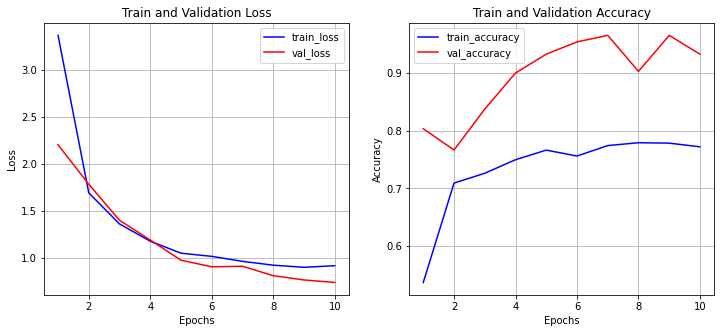

In [49]:
# 훈련데이터 검증데이터 loss, accuracy 시각화
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (12,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 테스트 데이터 평가

In [50]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'test_accuracy:{accuracy}\ntest_loss{loss}')

3/3 [==============================] - 1s 554ms/step - loss: 1.1941 - accuracy: 0.6889
test_accuracy:0.6888889074325562
test_loss1.1941266059875488


## VGG16 으로 모델링 해보기

In [51]:
from tensorflow.keras.applications import VGG16

# fc layer 빼고 vgg16 불러오기
vgg16_model = VGG16(weights='imagenet', include_top=False)
# Affine 계층만 학습하기 위해 convolution 계층은 freeze
vgg16_model.trainable = False

# regularizer 하이퍼파라미터
l2_factor = 0.01

# convolution 위에 레이어 쌓기
model_vgg = models.Sequential([
    vgg16_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(32, kernel_regularizer=regularizers.l2(l2_factor)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5), # Dropout 추가
    layers.Dense(6, kernel_regularizer=regularizers.l2(l2_factor)), 
    layers.BatchNormalization(),
    layers.Activation('softmax')])

model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [52]:
model_vgg.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
# early stop 세팅
early_stopper = EarlyStopping(
    monitor='val_loss',     
    patience=2,           
    verbose=1,
    mode='auto',            
    restore_best_weights=True  
)

# 모델 학습
history = model_vgg.fit(
    x_train,
    y_train,
    batch_size=32,
    validation_data=(x_val, y_val),
    epochs=10,
    callbacks=[early_stopper]
)

Epoch 1/10
89/89 [==============================] - 19s 150ms/step - loss: 2.0470 - accuracy: 0.4274 - val_loss: 2.0209 - val_accuracy: 0.5241
Epoch 2/10
89/89 [==============================] - 10s 116ms/step - loss: 1.5029 - accuracy: 0.6396 - val_loss: 1.7201 - val_accuracy: 0.7493
Epoch 3/10
89/89 [==============================] - 10s 116ms/step - loss: 1.2569 - accuracy: 0.7208 - val_loss: 1.4350 - val_accuracy: 0.7337
Epoch 4/10
89/89 [==============================] - 10s 115ms/step - loss: 1.0926 - accuracy: 0.7739 - val_loss: 1.3714 - val_accuracy: 0.6459
Epoch 5/10
89/89 [==============================] - 10s 115ms/step - loss: 0.9787 - accuracy: 0.8023 - val_loss: 1.0978 - val_accuracy: 0.7465
Epoch 6/10
89/89 [==============================] - 10s 114ms/step - loss: 0.9039 - accuracy: 0.8179 - val_loss: 0.9347 - val_accuracy: 0.8088
Epoch 7/10
89/89 [==============================] - 10s 115ms/step - loss: 0.8504 - accuracy: 0.8150 - val_loss: 0.7871 - val_accuracy: 0.8357

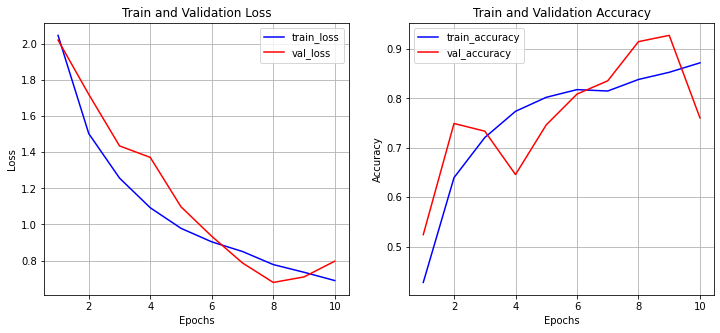

In [54]:
# 훈련데이터 검증데이터 loss, accuracy 시각화
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (12,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [55]:
loss, accuracy = model_vgg.evaluate(x_test, y_test)
print(f'test_accuracy:{accuracy}\ntest_loss{loss}')

3/3 [==============================] - 4s 2s/step - loss: 1.2385 - accuracy: 0.6444
test_accuracy:0.644444465637207
test_loss1.238524317741394


## MobileNet 으로 모델링 해보기

In [56]:
from tensorflow.keras.applications import MobileNet

# mobilenet 불러오기
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# 커스터마이즈 하기전에 freeze 
mobilenet_model.trainable = False

# mobilenet layer 이름들
for i, layer in enumerate(mobilenet_model.layers):
    print(i, layer.name)

0 input_3
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [57]:
for i in range(1,3+1):
    print(mobilenet_model.layers[-i].get_config())

{'name': 'conv_pw_13_relu', 'trainable': False, 'dtype': 'float32', 'max_value': array(6., dtype=float32), 'negative_slope': array(0., dtype=float32), 'threshold': array(0., dtype=float32)}
{'name': 'conv_pw_13_bn', 'trainable': False, 'dtype': 'float32', 'axis': ListWrapper([3]), 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'conv_pw_13', 'trainable': False, 'dtype': 'float32', 'filters': 1024, 'kernel_size': (1, 1), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'Gl

In [58]:
# unfreeze 할 레이어 선택하기
for i in range(1, 3+1):
    mobilenet_model.layers[-i].trainable = True

In [59]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU
# convolution 마지막 3개만 unfreeze, 그리고 customizing
x = mobilenet_model.input

# 우선 마지막 3번째 전까지는 레이어 추가
for layer in mobilenet_model.layers[:-3]:
    x = layer(x)
  
x = Conv2D(filters=1024, kernel_size=(1, 1), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

In [60]:
# convolution 위에 레이어 쌓기
# kernel_regularizer=regularizers.l2(0.1)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x) # Dropout 추가, 0.25 혹은 0.2
x = layers.Dense(6)(x) 
x = layers.BatchNormalization()(x)
x = layers.Activation('softmax')(x)

new_model = Model(inputs=mobilenet_model.input, outputs=x)

new_model.summary()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_3
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            multiple             0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 90, 90, 32)   864         input_3[1][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 90, 32)   128         conv1[1][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 90, 90, 32)   0           con

In [61]:
new_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
# early stop 세팅
early_stopper = EarlyStopping(
    monitor='val_loss',     
    patience=4,           
    verbose=1,
    mode='auto',            
    restore_best_weights=True  
)

# 모델 학습
history = new_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    callbacks=[early_stopper]
)

Epoch 1/15
89/89 [==============================] - 7s 46ms/step - loss: 1.2997 - accuracy: 0.8381 - val_loss: 1.2871 - val_accuracy: 0.6572
Epoch 2/15
89/89 [==============================] - 3s 31ms/step - loss: 0.7026 - accuracy: 0.9745 - val_loss: 0.6647 - val_accuracy: 0.9759
Epoch 3/15
89/89 [==============================] - 3s 31ms/step - loss: 0.5127 - accuracy: 0.9819 - val_loss: 0.5524 - val_accuracy: 0.9731
Epoch 4/15
89/89 [==============================] - 3s 31ms/step - loss: 0.4100 - accuracy: 0.9904 - val_loss: 0.3409 - val_accuracy: 0.9943
Epoch 5/15
89/89 [==============================] - 3s 31ms/step - loss: 0.3624 - accuracy: 0.9908 - val_loss: 0.2729 - val_accuracy: 0.9901
Epoch 6/15
89/89 [==============================] - 3s 31ms/step - loss: 0.3505 - accuracy: 0.9894 - val_loss: 0.2634 - val_accuracy: 0.9915
Epoch 7/15
89/89 [==============================] - 3s 31ms/step - loss: 0.2986 - accuracy: 0.9915 - val_loss: 0.2614 - val_accuracy: 0.9873
Epoch 8/15
89

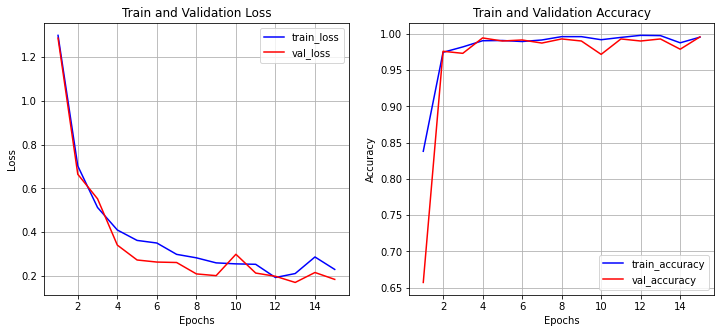

In [63]:
# 훈련데이터 검증데이터 loss, accuracy 시각화
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (12,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [64]:
loss, accuracy = new_model.evaluate(x_test, y_test)
print(f'test_accuracy:{accuracy}\ntest_loss{loss}')

3/3 [==============================] - 0s 143ms/step - loss: 0.6634 - accuracy: 0.8667
test_accuracy:0.8666666746139526
test_loss0.6633709073066711


## 평가 시각화

In [65]:
predictions = new_model.predict(x_test)

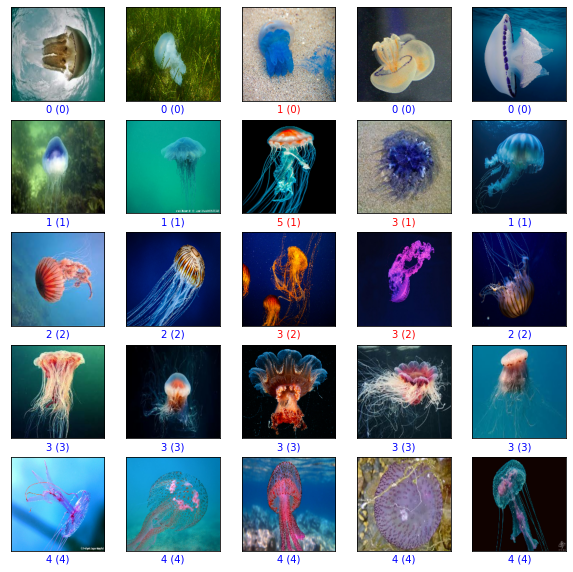

In [66]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

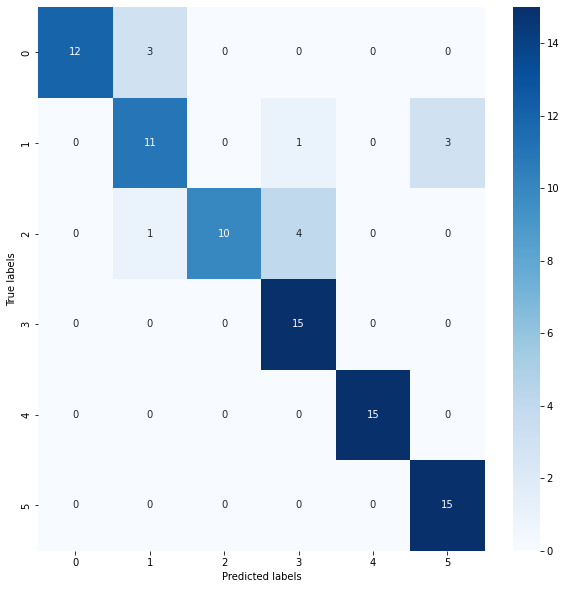

In [67]:
import seaborn as sns       

# sklearn.metrics 모듈에서 confusion_matrix 함수를 가져온다.
# 이 함수는 컨퓨전 매트릭스를 계산하는 데 사용된다.
from sklearn.metrics import confusion_matrix         

    
# 예측된 레이블 생성
# np.argmax 함수는 각 예측에서 가장 높은 확률을 가진 클래스의 인덱스를 반환
y_pred = np.argmax(predictions, axis=1)          

# 컨퓨전 매트릭스 생성
# confusion_matrix 함수를 사용하여 실제 레이블(y_test)과 예측된 레이블(y_pred) 사이의 컨퓨전 매트릭스를 생성
cm = confusion_matrix(y_test, y_pred)         

# 컨퓨전 매트릭스 시각화
plt.figure(figsize=(10, 10))                             # 새로운 그림을 생성하고 그림의 크기를 설정
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')      # seaborn의 heatmap 함수를 사용하여 컨퓨전 매트릭스를 히트맵 형태로 표시
plt.xlabel('Predicted labels')                           # x축 레이블을 설정
plt.ylabel('True labels')                                # y축 레이블을 설정
plt.show()